In [1]:
import sys
sys.path.append('..')
import torch
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from utils.data_utils import get_dataloader, get_data_tag
from utils.test_utils import Tester
from models.models import MLP, CNN, CNNResNet, CausalCNNResNet

rcParams['svg.fonttype'] = 'none'
rcParams['font.family'] = 'SimHei'
rcParams['axes.unicode_minus'] = False

In [2]:
data, tag = get_data_tag(faultP=[0, 1], desample=512)

In [3]:
train_loader, test_loader = get_dataloader(data, tag)

Train set size: 16048
Test set size: 4012


In [4]:
cnn = CNN(
    input_channels=512, conv_layers=[(32, 1, 1, 1), (64, 1, 1, 1)], fc_layers=[128], num_classes=22)
cnn_res = CNNResNet(cnn, 22)

In [5]:
cnn_res

CNNResNet(
  (cnn): CNN(
    (conv_layers): Sequential(
      (0): Conv1d(512, 32, kernel_size=(1,), stride=(1,), padding=(1,))
      (1): ReLU()
      (2): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (3): Conv1d(32, 64, kernel_size=(1,), stride=(1,), padding=(1,))
      (4): ReLU()
      (5): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (fc_layers): Sequential(
      (0): Linear(in_features=192, out_features=128, bias=True)
      (1): ReLU()
      (2): Linear(in_features=128, out_features=22, bias=True)
    )
  )
  (resnet): ResNet(
    (conv1): Conv1d(1, 64, kernel_size=(7,), stride=(2,), padding=(3,), bias=False)
    (bn1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool1d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv1d(64, 64, kernel

In [6]:
test_cnn_res = Tester(model=cnn_res, epoch=20)

The device is: cuda
The tester initialization is completed.


In [7]:
test_cnn_res.train(train_loader=train_loader)

[INFO] EPOCH: 1/20
Train loss: 0.063507, Train accuracy: 0.3571
[INFO] EPOCH: 2/20
Train loss: 0.022088, Train accuracy: 0.7772
[INFO] EPOCH: 3/20
Train loss: 0.010487, Train accuracy: 0.8993
[INFO] EPOCH: 4/20
Train loss: 0.006208, Train accuracy: 0.9429
[INFO] EPOCH: 5/20
Train loss: 0.003867, Train accuracy: 0.9651
[INFO] EPOCH: 6/20
Train loss: 0.003193, Train accuracy: 0.9699
[INFO] EPOCH: 7/20
Train loss: 0.002311, Train accuracy: 0.9796
[INFO] EPOCH: 8/20
Train loss: 0.002394, Train accuracy: 0.9771
[INFO] EPOCH: 9/20
Train loss: 0.001718, Train accuracy: 0.9845
[INFO] EPOCH: 10/20
Train loss: 0.001560, Train accuracy: 0.9854
[INFO] EPOCH: 11/20
Train loss: 0.001437, Train accuracy: 0.9860
[INFO] EPOCH: 12/20
Train loss: 0.001058, Train accuracy: 0.9913
[INFO] EPOCH: 13/20
Train loss: 0.001287, Train accuracy: 0.9874
[INFO] EPOCH: 14/20
Train loss: 0.001249, Train accuracy: 0.9875
[INFO] EPOCH: 15/20
Train loss: 0.001004, Train accuracy: 0.9897
[INFO] EPOCH: 16/20
Train loss: 0.

In [8]:
test_cnn_res.test(test_loader=test_loader)

[INFO] Test loss: 0.000189, Test accuracy: 99.8250
[INFO] The running time is: 0.4184231758117676s



In [9]:
test_cnn_res.calculate_performance_metrice()

In [10]:
test_cnn_res.metrics

{'Accuracy': 0.99825,
 'F1-score': 0.9984043042077096,
 'Kappa': 0.9981635054692775,
 'MAE': 0.01125,
 'Precision': 0.9983430612039246,
 'Recall': 0.998483021006657,
 'Specificity': 1.0,
 'Confusion Matrix': array([[115,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0, 116,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0, 120,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0, 240,   0,   0,   0,   0,   2,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0, 239,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   1,   0,   0],
        [  0,   0,   0,   0,   0, 247,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0, 

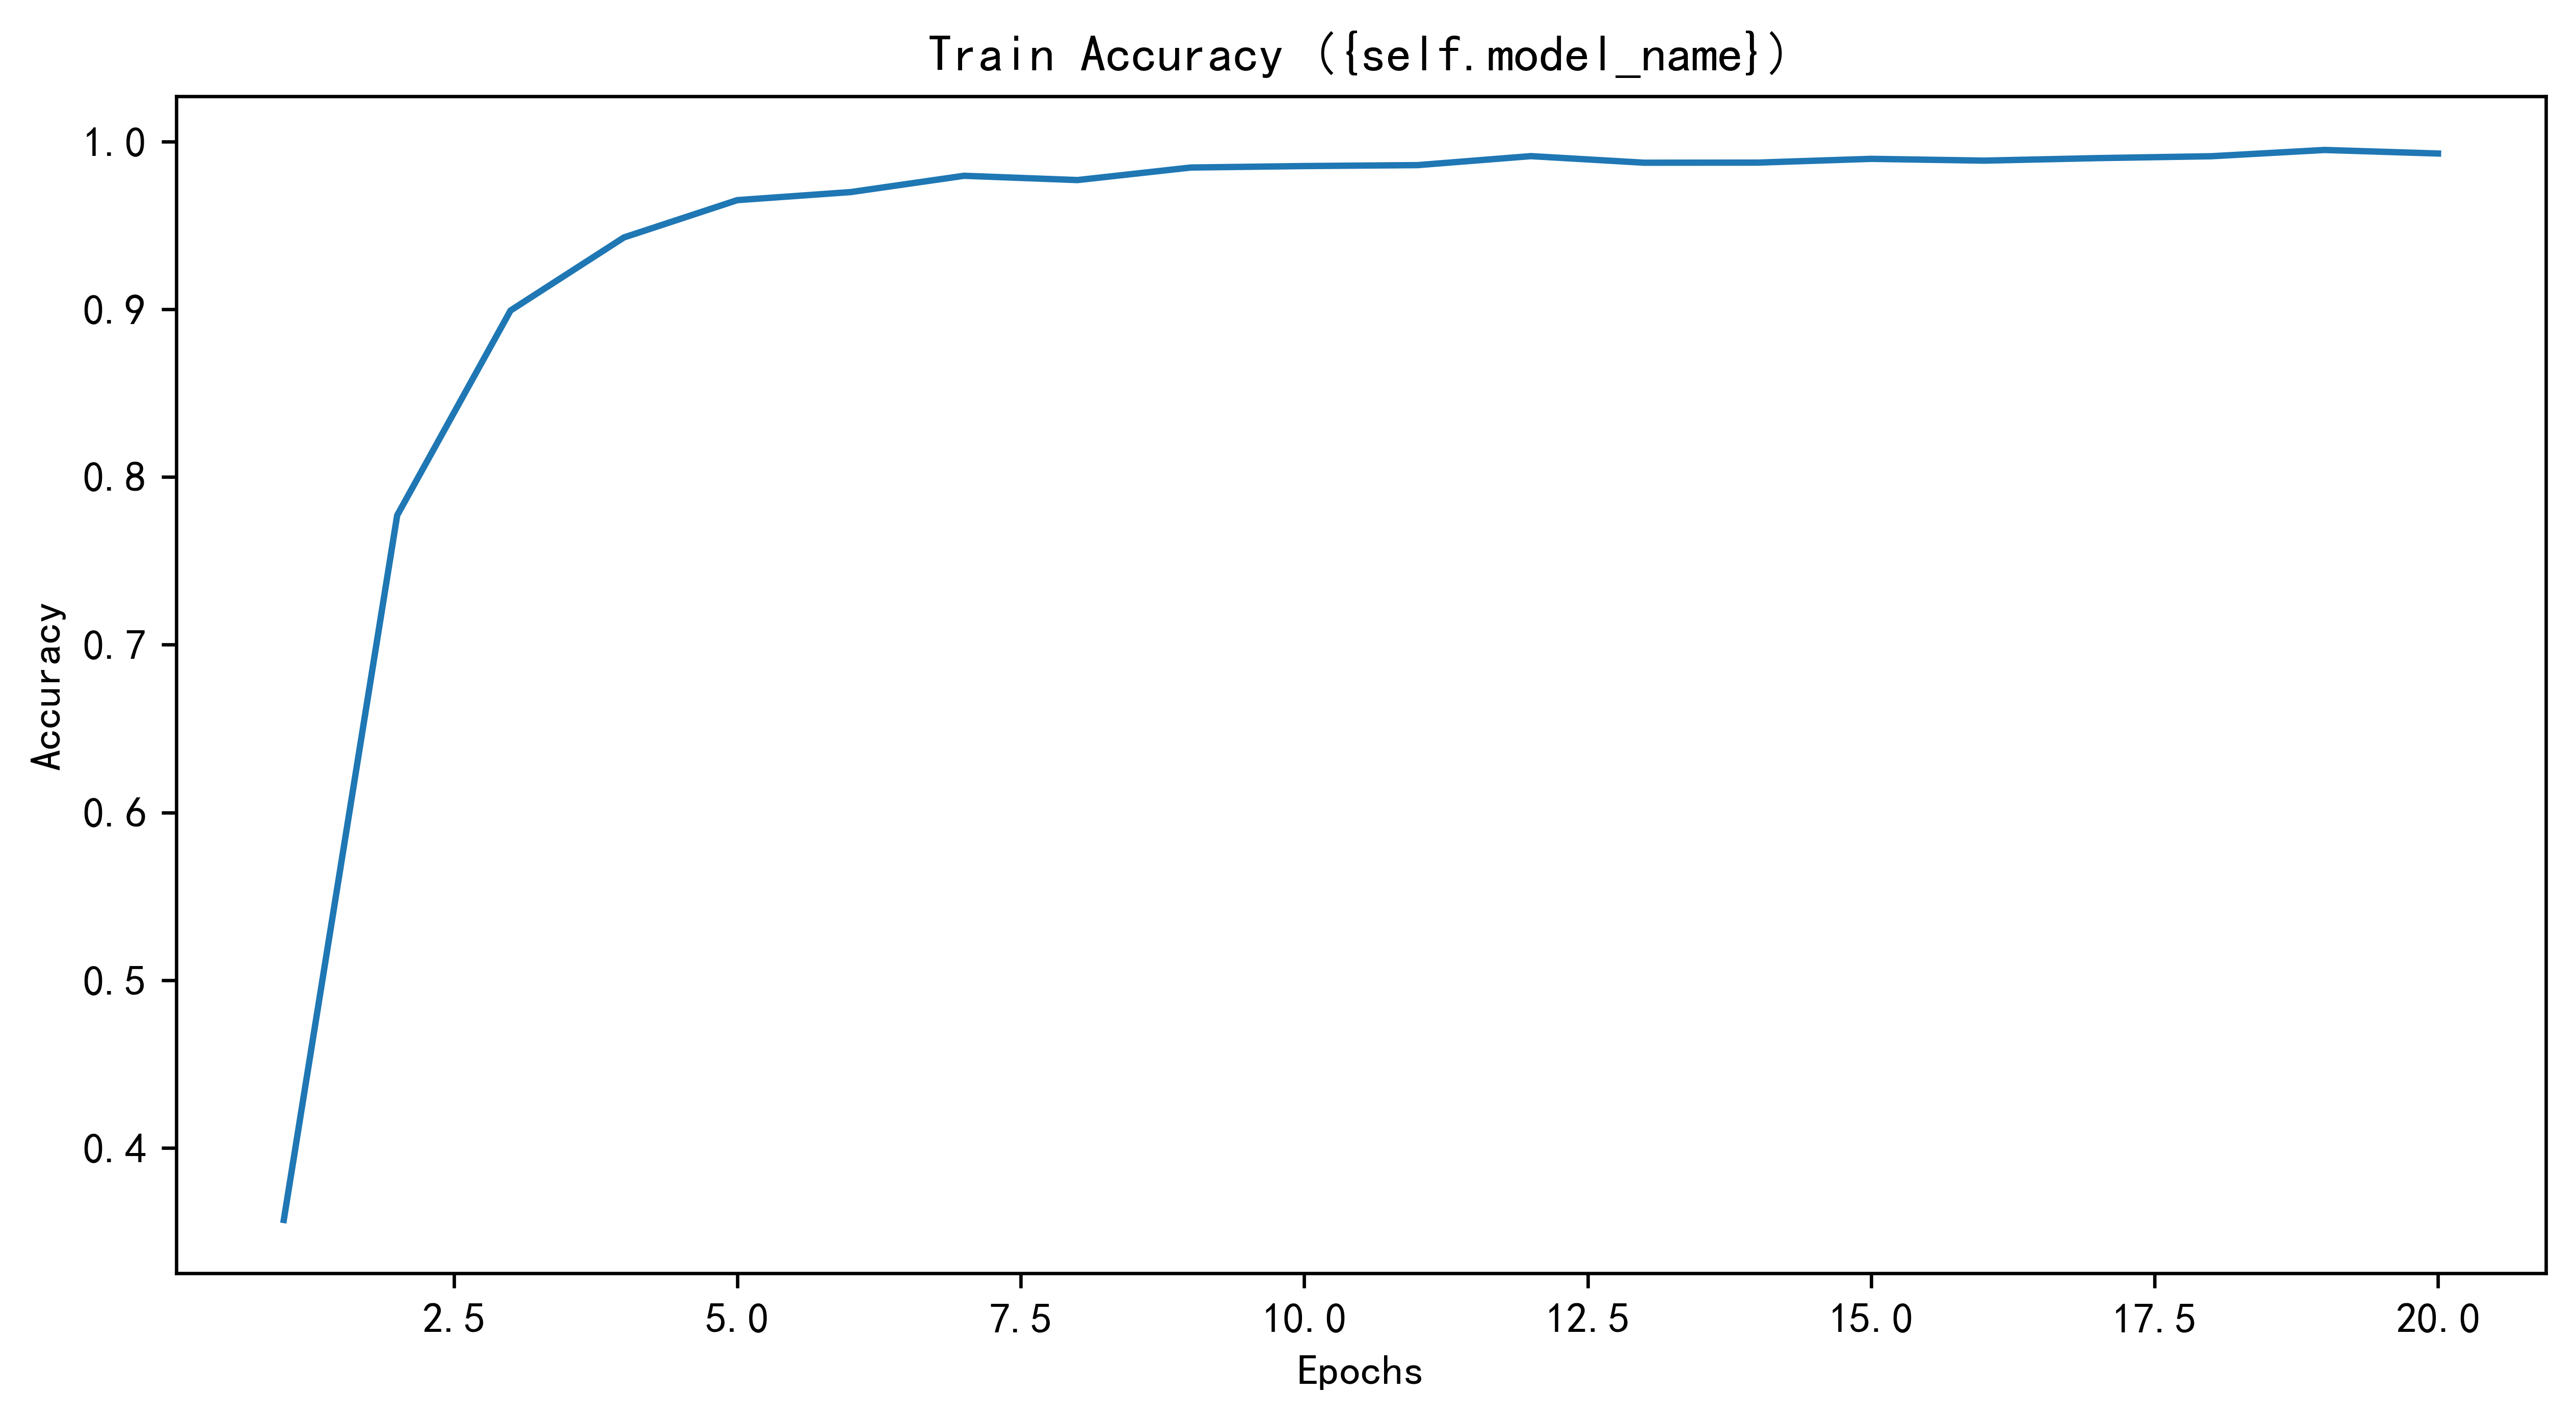

In [11]:
test_cnn_res.plot_accuracy()

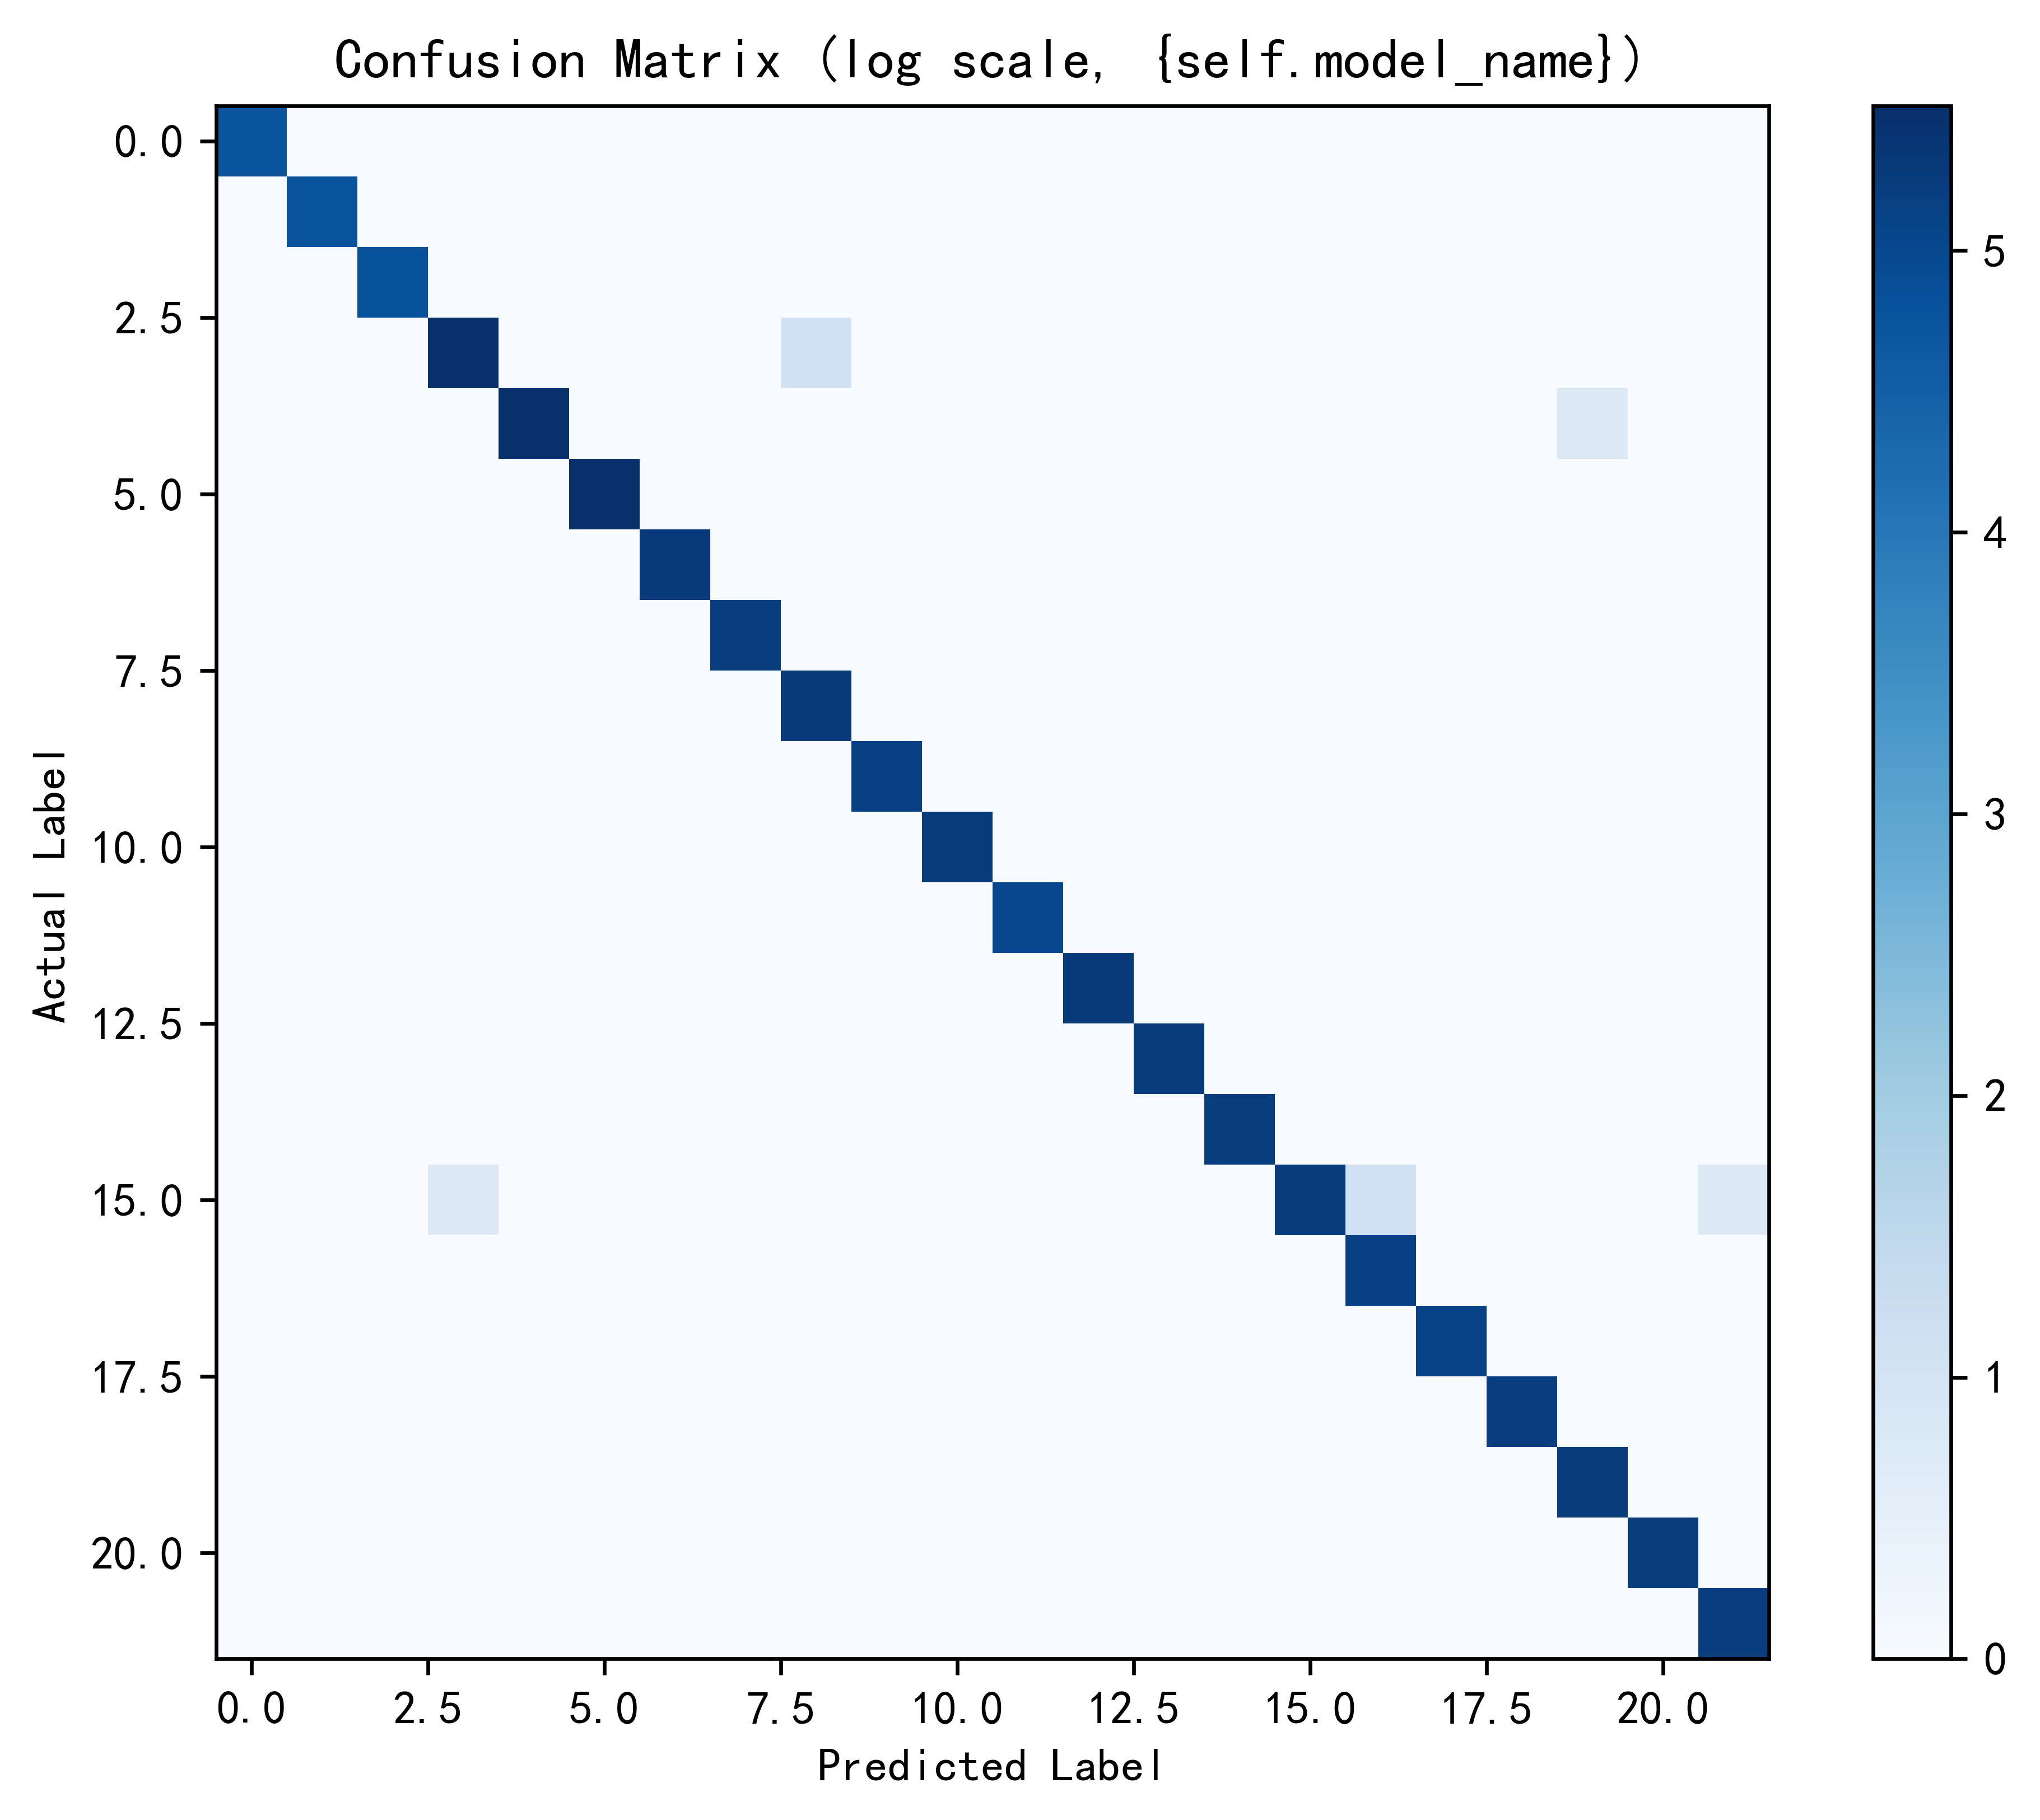

In [12]:
test_cnn_res.plot_confusion_matrix()